In [6]:
import numpy as np
import matplotlib.pyplot as plt
def cost_function(b0, b1, x, y):
    # assume x and y are in vector form
    # x = np.array([[1], [2], [3]])
    # y = np.array([[1], [2], [3]])
    # x = x.reshape(-1,1)
    m = len(x)
    a = np.ones(np.shape(x))
    x = np.hstack((a, x))
    theta = np.array([b0, b1])
    
    h_x = x.dot(theta).reshape(-1,1)
    cost = (1/(2*m))* np.sum(np.square(h_x-y))
    return cost

In [7]:
def gradient_function(b0, b1, x, y):
    # assum x and y are in vector form
    # x = np.array([[1], [2], [3]])
    m = len(x)
    a = np.ones(np.shape(x))
    X = np.hstack((a, x))
    theta = np.array([b0, b1])
    
    h_x = X.dot(theta).reshape(-1,1)
    
    gradient = (1/m)*(x.T.dot(h_x-y))
    return gradient[0][0]

In [28]:
def gradient_descent(x, y, b0, b1, learning_rate, iterations):
    cost_hist = []
    theta = np.array([b0, b1])
    c_prev = np.inf
    for i in range(iterations):
        theta = theta - (learning_rate*gradient_function(theta[0], theta[1], x, y))
        cost = cost_function(theta[0], theta[1], x, y)
        if c_prev-cost < 5e-7:
            return theta, cost_hist, i
        c_prev = cost
        cost_hist.append(cost)
        
    return theta, cost_hist, i

In [29]:
def import_data(filename:str):
    #imports data from a numpy file (.npy) and returns data
    #Here filename should have a .npy extension
    data = np.load(filename, allow_pickle=True)
    return data

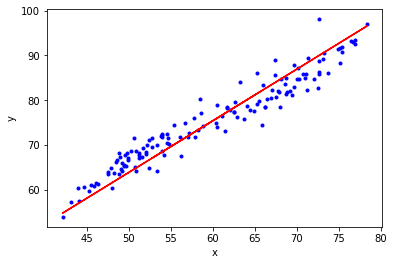

In [30]:
data = import_data('data.npy')
x = data[:, 0].reshape(-1,1)
y = data[:, 1].reshape(-1,1)
b0, b1 = 15, 10

theta, cost_hist, itr = gradient_descent(x, y, b0, b1, learning_rate=0.0001, iterations=10000)

plt.figure()
plt.plot(x, y, 'b.')
a = np.ones(np.shape(x))
X = np.hstack((a, x))
Y = X.dot(theta).reshape(-1,1)

plt.plot(x, Y, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

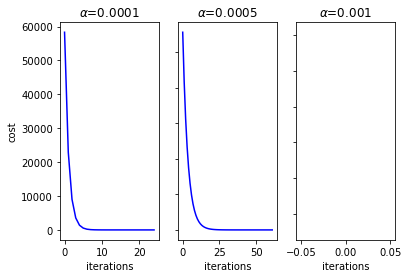

In [31]:
theta_1, cost_hist_1, itr_1 = gradient_descent(x, y, b0, b1, learning_rate=0.0005, iterations=10000)
theta_2, cost_hist_2, itr_2 = gradient_descent(x, y, b0, b1, learning_rate=0.001, iterations=10000)
figure, axes = plt.subplots(nrows=1, ncols=3)
axes[0].plot(np.arange(len(cost_hist)), cost_hist, 'b-')
axes[0].set_title(r'$\alpha$=0.0001')
axes[1].plot(np.arange(len(cost_hist_1)), cost_hist_1, 'b-')
axes[1].set_title(r'$\alpha$=0.0005')
axes[2].plot(np.arange(len(cost_hist_2)), cost_hist_2, 'b-')
axes[2].set_title(r'$\alpha$=0.001')
#the learning rate is too high, so we are taking too large steps and jumping over global minim

# axes[0].plot(x, Y, 'r')


for ax in axes.flat:
    ax.set(xlabel='iterations', ylabel='cost')

for ax in axes.flat:
    ax.label_outer()

plt.show()

The learning rate at 0.0001 seems to be the best because it converges with a shorter number of iterations. The learning rate at 0.001 is the worst here because of 
//if c_prev-cost < 5e-7:
//      return theta, cost_hist, i//

This was not able to progress because the cost was increasing. The jump steps were too high and the gradient exploded.

In [34]:
def mini_batch_gradient_descent(x, y, b0, b1, learning_rate, iterations, batch_size):
    theta = np.array([b0, b1])
    m = len(x)
    # batch_num = int(m/batch_size)
    cost_hist = []
    c_prev = np.inf
    for j in range(iterations):
        idx = np.random.randint(0, m, size=(20))
        x_j = x[idx]
        y_j = y[idx]
        theta = theta - (learning_rate*gradient_function(theta[0], theta[1], x_j, y_j))
        cost = cost_function(theta[0], theta[1], x_j, y_j)
        if c_prev-cost < 5e-7:
            return theta, cost_hist, j
        c_prev = cost
        cost_hist.append(cost)

    return theta, cost_hist, j

Text(0, 0.5, 'cost')

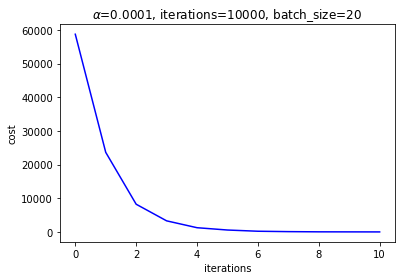

In [36]:
data = import_data('data.npy')
x = data[:, 0].reshape(-1,1)
y = data[:, 1].reshape(-1,1)
b0, b1 = 15, 10

theta, cost_hist, it = mini_batch_gradient_descent(x, y, b0, b1, learning_rate=0.0001, iterations=10000, batch_size=20)
plt.figure()
plt.plot(np.arange(len(cost_hist)), cost_hist, 'b-')
plt.title(r'$\alpha$=0.0001, iterations=10000, batch_size=20')
plt.xlabel('iterations')
plt.ylabel('cost')

The mini batch reduces the number of iterations till convergence than the regular gradient descent function.